In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

This is a potential way to modify Cheat Detection Rule 1 to fix the problem of old Rule 1, Pairwise Time Rule.

Old rule calculates time similarity score for a pair of students by $\large \frac{N}{N_s}$, Ns being the total number of problems shared between their exams, N being the number of problems that they submitted within the time window we choose.

This notebook proposes a new way of calculating time similarity score with a weighted approach. Every increment in N will result in an increase in their similarity score S. The bigger the N, the greater the increase. Every new increase is w times the last increase, with w denoting the weight factor in the rest of the notebook. 
$$\large S(N, N_s, w) = \large \frac{1}{N_s + 1} \sum_{i=1}^N w^i $$

In [12]:
# This is the function that calculates similarity score given the total number of 
# questions in an exam, the number of shared questions between two students, the number of questions submitted 
# in the same time window, and the factor of weight increase

# The total number of questions is not used here, but we can think about including it in the process of
# determining the weight factor.

def new_rule_1(tot_q, share_q, same_q, weight_fac):
    score_sum = 0
    weight = 1
    for i in range(same_q):
        score_sum += weight
        weight *= weight_fac
    return score_sum / (share_q + 1) # in case two students has no shared question
    

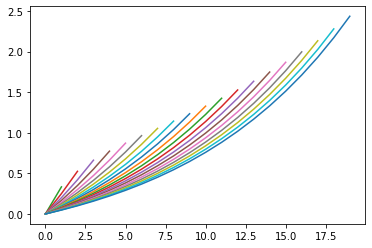

In [17]:
# This block tests the functionality of the function of new rule 1 and plots the similarity score output of
# of different combinations of shared_q and same_q, assuming an exam with 20 questions.

weight_fac = 1.1       #can be changed to other values
tot_q = 20

all_score = []
x = []
for share_q in range(tot_q + 1):
    share_score = []
    x += [share_q]
    for same_q in range(share_q):
        share_score += [new_rule_1(tot_q, share_q, same_q, weight_fac)]

    all_score += [share_score]    
    
for a in range(tot_q + 1):
    plt.plot(range(a), all_score[a])


One possible problem of this approach is that it cannot capture cases in which students cheat on only a few questions (1 or 2). 